## Загрузим нужные библиотеки

https://python-school.ru/blog/nlp-vectorization-methods/ (4 метода векторизации текстов)

https://python-school.ru/blog/nlp-text-preprocessing/ (Предобработка текста в NLP)

https://python-school.ru/blog/what-is-word2vec/ (Как работает Word2Vec: нейросети для NLP)

https://python-school.ru/blog/russian-text-preprocessing/?ysclid=l5r25d3ldg544162530 (Обучение NLP-модели Word2veс на русских текстах с Python)
https://python-school.ru/blog/word2vec-with-examples-in-gensim/?ysclid=l5r2cu50a8657126615 (Обучение NLP-модели Word2veс на русских текстах с Python)

In [1]:
#!pip install pandas

In [2]:
#!pip install -U scikit-learn scipy matplotlib

In [3]:
#!pip install nltk

In [4]:
#!pip install pymorphy2

In [6]:
#!pip install gensim

In [115]:
#!pip install torch

  Using cached torch-1.12.0-cp310-cp310-win_amd64.whl (162.3 MB)
  Using cached typing_extensions-4.3.0-py3-none-any.whl (25 kB)


In [162]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [3]:
import pymorphy2
import nltk

In [4]:
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords

In [5]:
from gensim.models import Word2Vec

In [6]:
patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Сергей\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()

In [9]:
def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            tokens.append(token)
    if len(tokens) > 2:
        return tokens
    return None

Выполним загрузу датсета

In [57]:
df_train = pd.read_csv("./content/train_dataset_train.csv", index_col= 0)

In [58]:
df_train["title"]= df_train["title"].fillna("")

## Подготовим датасет

In [59]:
#df_train.info()

Заменим категорию и автора на число

In [60]:
df_train["category"] = df_train["category"].astype('category')
df_train["category"] = df_train["category"].cat.codes
df_train["category"] = df_train["category"].astype('int')

In [61]:
#df_train['title'].str.split().str.len()

In [62]:
df_train["authors"] = df_train["authors"].astype('category')
df_train["authors"] = df_train["authors"].cat.codes
df_train["authors"] = df_train["authors"].astype('int')

In [63]:
df_train['day'] = pd.to_datetime(df_train['publish_date']).dt.strftime("%d").astype(int)
df_train['mounth'] = pd.to_datetime(df_train['publish_date']).dt.strftime("%m").astype(int)

In [64]:
#df_train.head(3)

In [65]:
df_train["title"] = df_train["title"].apply(lemmatize)

In [66]:
df_train["title"]= df_train["title"].fillna("")

In [67]:
#df_train["title"]

In [68]:
#df_train.iloc[:, df_train.columns.get_loc("title")]

In [69]:
#from collections import defaultdict
#
#word_freq = defaultdict(int)
#for tokens in df_train.iloc[:,df_train.columns.get_loc("title")]:
#    if tokens == None:
#        continue
#    for token in tokens:
#        word_freq[token] += 1

In [70]:
#len(word_freq)

In [71]:
#sort_word_freq = sorted(word_freq, key=word_freq.get, reverse=True)[:300]
#for key in sort_word_freq:
#    print(key, ":", word_freq[key])

In [72]:
w2v_model = Word2Vec(
    min_count=10,
    window=2,
    vector_size=1,
    negative=10,
    alpha=0.03,
    min_alpha=0.0007,
    sample=6e-5,
    sg=1)

In [73]:
w2v_model.build_vocab(df_train["title"])

In [74]:
w2v_model.train(df_train["title"], total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(298359, 1594980)

In [75]:
#len(w2v_model.wv)

In [76]:
#w2v_model.init_sims(replace=True)
w2v_model.save("w2v_model")

In [77]:
w2v_model = Word2Vec.load("w2v_model")

In [78]:
def words2vectorize(words):
    i = 0
    res = np.zeros(1, dtype=np.float64)
    for word in words:
        if i == 0:
            if word in w2v_model.wv:
                res = np.array(w2v_model.wv[word], dtype=np.float64)
                i += 1
    if i:
        res /= i
    return res.tolist()[0]

In [79]:
df_train["title_vec"] = df_train["title"].apply(words2vectorize)

In [80]:
#df_train["title_vec"]

document_id
624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ    1.510046
620f6b899a7947701cf489e1KtVJsteHStO5oditt3Uvzw    1.453534
620730cf9a7947ab96a44e27hk7puWJwSziw0m3sfTkKWA    1.447902
6262a5889a79470b78c9ca307UKY2SSZTjCcjhwBzxw37w    1.459806
626678929a79477ca0101568wuMYES90REuV5YhrN75IXg    1.489043
                                                    ...   
61fd479c9a7947848183694751RC_1i5QlGuv7B2FzwTjw    1.519706
628a8f1c9a79478c64a7dae450tIkSGVSf2O8XQgk_uaHQ    1.497758
6244cf5e9a79479099346b26tKlqoxQYSmij0ZBrGzebug    0.000000
627303699a794749b8116abc12JX_3ZDTDu2XHF3k2eJVg    1.496660
627f1c089a794743b070ff73hVvdVmFxS2SlZ2_lECDEow    1.510223
Name: title_vec, Length: 7000, dtype: float64

In [81]:
#df_train["tags"]

In [82]:
def listize(doc):
    doc = doc.strip('[]').split(',')
    tokens = []
    for i in range(len(doc)):
        token = doc[i].strip(" '")
        tokens.append(token)
    return tokens

In [83]:
df_train["tags"] = df_train["tags"].apply(listize)
#df_train["tags"]

In [84]:
#tag_freq = dict()
#for tags in df_train.iloc[:,df_train.columns.get_loc("tags")]:
#    for tag in tags:
#        tag_freq[tag] = tag_freq.get(tag, 0) + 1

In [85]:
#tag_freq

In [86]:
#len(tag_freq)

In [87]:
#sort_tag_freq = sorted(tag_freq, key=tag_freq.get, reverse=True)[:100]
#for key in sort_tag_freq:
#    print(key, ":", tag_freq[key])

In [88]:
t2v_model = Word2Vec(
    min_count=10,
    window=2,
    vector_size=1,
    negative=10,
    alpha=0.03,
    min_alpha=0.0007,
    sample=6e-5,
    sg=1)

In [89]:
t2v_model.build_vocab(df_train["tags"])

In [90]:
#len(t2v_model.wv.index_to_key)

In [91]:
t2v_model.train(df_train["tags"], total_examples=t2v_model.corpus_count, epochs=30, report_delay=1)

(86647, 822150)

In [92]:
#len(t2v_model.wv)

In [93]:
t2v_model.save("t2v_model")

In [94]:
t2v_model = Word2Vec.load("t2v_model")

In [95]:
def tags2vectorize(tags):
    i = 0
    res = np.zeros(1, dtype=np.float64)
    for tag in tags:
        if i == 0:
            if tag in t2v_model.wv:
                res = np.array(t2v_model.wv[tag], dtype=np.float64)
                i += 1
    if i:
        res /= i
    return res.tolist()[0]

In [96]:
df_train["tags_vec"] = df_train["tags"].apply(tags2vectorize)

In [97]:
#df_train["tags_vec"]

document_id
624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ    1.529426
620f6b899a7947701cf489e1KtVJsteHStO5oditt3Uvzw    1.975242
620730cf9a7947ab96a44e27hk7puWJwSziw0m3sfTkKWA    0.984491
6262a5889a79470b78c9ca307UKY2SSZTjCcjhwBzxw37w    1.125947
626678929a79477ca0101568wuMYES90REuV5YhrN75IXg    1.510204
                                                    ...   
61fd479c9a7947848183694751RC_1i5QlGuv7B2FzwTjw    1.596855
628a8f1c9a79478c64a7dae450tIkSGVSf2O8XQgk_uaHQ   -0.015231
6244cf5e9a79479099346b26tKlqoxQYSmij0ZBrGzebug    0.032538
627303699a794749b8116abc12JX_3ZDTDu2XHF3k2eJVg    1.401764
627f1c089a794743b070ff73hVvdVmFxS2SlZ2_lECDEow    1.719727
Name: tags_vec, Length: 7000, dtype: float64

In [98]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ to 627f1c089a794743b070ff73hVvdVmFxS2SlZ2_lECDEow
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               7000 non-null   object 
 1   publish_date        7000 non-null   object 
 2   session             7000 non-null   object 
 3   authors             7000 non-null   int32  
 4   ctr                 7000 non-null   float64
 5   category            7000 non-null   int32  
 6   tags                7000 non-null   object 
 7   views               7000 non-null   int64  
 8   depth               7000 non-null   float64
 9   full_reads_percent  7000 non-null   float64
 10  day                 7000 non-null   int32  
 11  mounth              7000 non-null   int32  
 12  title_vec           7000 non-null   float64
 13  tags_vec            7000 non-null   float64
dtypes: float64(5), int32(4

In [148]:
features = ['authors', 'ctr', 'category', 'day', 'mounth', 'title_vec', 'tags_vec']
df_train = df_train[features + ['views','depth','full_reads_percent']]
df_train

,authors,ctr,category,day,mounth,title_vec,tags_vec,views,depth,full_reads_percent
document_id,,,,,,,,,,
624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ,560,1.580,2,4,4,1.510046,1.529426,20460,1.134,35.850
620f6b899a7947701cf489e1KtVJsteHStO5oditt3Uvzw,38,1.853,0,18,2,1.453534,1.975242,19038,1.142,38.355
620730cf9a7947ab96a44e27hk7puWJwSziw0m3sfTkKWA,560,0.000,0,12,2,1.447902,0.984491,51151,1.185,36.424
6262a5889a79470b78c9ca307UKY2SSZTjCcjhwBzxw37w,560,0.000,0,22,4,1.459806,1.125947,3782,1.053,30.169
626678929a79477ca0101568wuMYES90REuV5YhrN75IXg,560,0.000,5,25,4,1.489043,1.510204,3065,1.063,34.617
...,...,...,...,...,...,...,...,...,...,...
61fd479c9a7947848183694751RC_1i5QlGuv7B2FzwTjw,132,2.354,5,4,2,1.519706,1.596855,21738,1.188,28.448
628a8f1c9a79478c64a7dae450tIkSGVSf2O8XQgk_uaHQ,424,4.112,3,22,5,1.497758,-0.015231,8377,1.056,38.045
6244cf5e9a79479099346b26tKlqoxQYSmij0ZBrGzebug,560,5.125,5,30,3,0.000000,0.032538,37004,1.176,50.757


In [149]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ to 627f1c089a794743b070ff73hVvdVmFxS2SlZ2_lECDEow
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   authors             7000 non-null   int32  
 1   ctr                 7000 non-null   float64
 2   category            7000 non-null   int32  
 3   day                 7000 non-null   int32  
 4   mounth              7000 non-null   int32  
 5   title_vec           7000 non-null   float64
 6   tags_vec            7000 non-null   float64
 7   views               7000 non-null   int64  
 8   depth               7000 non-null   float64
 9   full_reads_percent  7000 non-null   float64
dtypes: float64(5), int32(4), int64(1)
memory usage: 750.2+ KB


In [150]:
# разделим датасет на трейн и валидацию, чтобы смотреть на качество
train_df, valid_df = train_test_split(df_train, test_size=0.2, random_state=43)

In [151]:
train_df.shape, valid_df.shape

((5600, 10), (1400, 10))

In [152]:
features

['authors', 'ctr', 'category', 'day', 'mounth', 'title_vec', 'tags_vec']

In [153]:
def get_features_labels(df):
    #features = df.iloc[:, 0:5] + df.iloc[:,11:]
    features = df.iloc[:, :7]
    labels = df.iloc[:, 7:]
    return features, labels

In [154]:
x_train, y_train = get_features_labels(train_df)
#x_train.shape

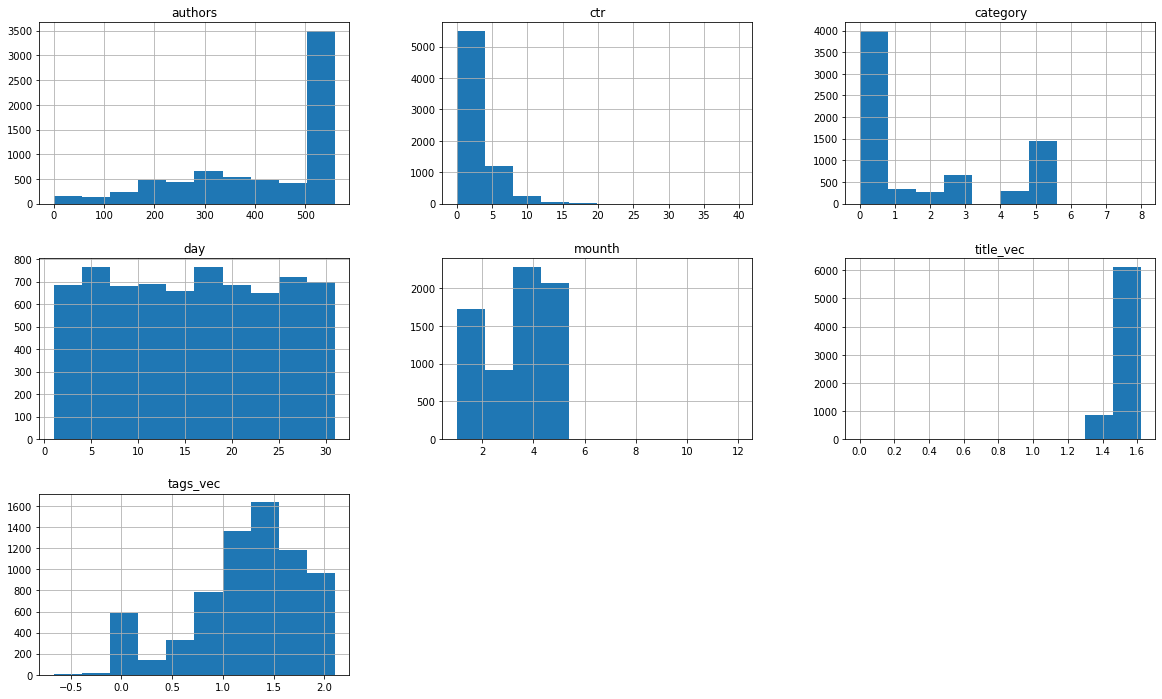

In [155]:
#features = list(set(df_train.columns) - set(['publish_date']))

_ = df_train[features].hist(figsize=(20,12))

Всего 9 категорий статей

In [156]:
df_train.category.value_counts()

0    3988
5    1456
3     667
1     338
4     283
2     265
7       1
6       1
8       1
Name: category, dtype: int64

## Выделим выборки

In [157]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ to 627f1c089a794743b070ff73hVvdVmFxS2SlZ2_lECDEow
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   authors             7000 non-null   int32  
 1   ctr                 7000 non-null   float64
 2   category            7000 non-null   int32  
 3   day                 7000 non-null   int32  
 4   mounth              7000 non-null   int32  
 5   title_vec           7000 non-null   float64
 6   tags_vec            7000 non-null   float64
 7   views               7000 non-null   int64  
 8   depth               7000 non-null   float64
 9   full_reads_percent  7000 non-null   float64
dtypes: float64(5), int32(4), int64(1)
memory usage: 750.2+ KB


In [158]:
X = df_train.drop(['views', 'depth', 'full_reads_percent'], axis = 1)
y = df_train[['views', 'depth', 'full_reads_percent']]

In [159]:
X.head()

,authors,ctr,category,day,mounth,title_vec,tags_vec
document_id,,,,,,,
624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ,560,1.580,2,4,4,1.510046,1.529426
620f6b899a7947701cf489e1KtVJsteHStO5oditt3Uvzw,38,1.853,0,18,2,1.453534,1.975242
620730cf9a7947ab96a44e27hk7puWJwSziw0m3sfTkKWA,560,0.000,0,12,2,1.447902,0.984491
6262a5889a79470b78c9ca307UKY2SSZTjCcjhwBzxw37w,560,0.000,0,22,4,1.459806,1.125947
626678929a79477ca0101568wuMYES90REuV5YhrN75IXg,560,0.000,5,25,4,1.489043,1.510204


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Подбор модели

In [169]:
regr = RandomForestRegressor(random_state=42)

Обучим модель

In [170]:
regr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Предскажем значения

In [171]:
pred = regr.predict(X_test)

## Оценка точности

In [172]:
score_views = r2_score(y_test["views"], pred[:,0])
score_depth = r2_score(y_test["depth"], pred[:,1])
score_frp = r2_score(y_test["full_reads_percent"], pred[:,2])

In [173]:
score = 0.4 * score_views + 0.3 * score_depth + 0.3 * score_frp
score

0.519440264291221

In [189]:
df_test = pd.read_csv("./content/test_dataset_test.csv", index_col= 0)

In [210]:
len(df_test)

3000

In [190]:
df_test["title"]= df_test["title"].fillna("")

In [191]:
df_test["category"] = df_test["category"].astype('category')
df_test["category"] = df_test["category"].cat.codes
df_test["category"] = df_test["category"].astype('int')

In [192]:
df_test["authors"] = df_test["authors"].astype('category')
df_test["authors"] = df_test["authors"].cat.codes
df_test["authors"] = df_test["authors"].astype('int')

In [193]:
df_test['day'] = pd.to_datetime(df_test['publish_date']).dt.strftime("%d").astype(int)
df_test['mounth'] = pd.to_datetime(df_test['publish_date']).dt.strftime("%m").astype(int)

In [194]:
df_test["title"] = df_test["title"].apply(lemmatize)

In [195]:
df_test["title"]= df_test["title"].fillna("")

In [196]:
w2v_model = Word2Vec.load("w2v_model")

In [197]:
df_test["title_vec"] = df_test["title"].apply(words2vectorize)

In [198]:
df_test["tags"] = df_test["tags"].apply(listize)

In [199]:
t2v_model = Word2Vec.load("t2v_model")

In [200]:
df_test["tags_vec"] = df_test["tags"].apply(tags2vectorize)

In [201]:
features = ['authors', 'ctr', 'category', 'day', 'mounth', 'title_vec', 'tags_vec']
df_test = df_test[features]

In [202]:
df_test

,authors,ctr,category,day,mounth,title_vec,tags_vec
document_id,,,,,,,
61f9569a9a794794245a82abJ0AvX96vTAaQCiWVbzoMdw,325,0.000,0,1,2,1.481224,1.525749
628c22b89a79470e553f594bQS5CqzXYRnmDdR2LaSreEw,325,1.598,0,24,5,1.514369,1.586766
627cb3249a7947ebdd752865XVsoyrUOT8OJJg2_finJhw,325,2.006,0,12,5,1.501416,1.546970
628618629a7947d4927eb812upfii3whSSuMXCqcqF8VbQ,325,0.000,0,19,5,1.489043,2.022437
620e76109a7947235623695b5hzCiIHdSYKQIr8WAM18bw,217,9.136,0,17,2,1.430166,2.070782
...,...,...,...,...,...,...,...
623ba6bc9a79470214cb9418x4OZQ1IjTb27nPAgv5wAZg,164,1.788,4,23,3,1.523317,1.627977
624fda1f9a79471a9bd102eetuRTrLPGSZyNbc9_YcBAeQ,188,4.427,3,8,4,1.529658,1.376027
6257a6a99a79477eea75b86dtBr3UG9ORW-gOybkVKX6ww,325,0.000,1,14,4,1.456293,1.515359


In [212]:
pred = regr.predict(df_test)

In [214]:
len(pred)

3000

In [215]:
test_names = df_test.index.tolist()

In [216]:
len(test_names)

3000

In [217]:
submit_df = pd.DataFrame([[name, pred[0], pred[1], pred[2]] for name, pred in zip(test_names, pred)], columns=['document_id','views','depth','full_reads_percent'])

In [218]:
submit_df.to_csv("submit.csv", index=False)

In [219]:
a=6800/3600

In [220]:
a

1.8888888888888888